In [1]:
import numpy as np
import csv
import pandas as pd
import random
from math import sqrt, pi, exp, log
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pdf(mu=0, sigma=1):
    s2= sigma*sigma
    return lambda x: 1/sqrt(2*pi*(s2)) * exp(-(x-mu)**2/(2*s2))

In [3]:
def plot1(frame,pdfW,pdfM,m_mu,m_sigma,w_mu,w_sigma, plot=False):
########################
    if plot:
        plt.figure(1)
        plt.plot(frame['theta'], frame['w'], '-')
        plt.plot(frame['theta'], frame['m'], '-')

        axis= [frame['theta'].min()
               ,frame['theta'].max()
               ,0
               ,min(max(frame['m'].max(),frame['w'].max()),1.5)
              ]

        w_atMu= pdfW(w_mu)
        m_atMu= pdfM(m_mu)

        w_atSigma= pdfW(w_sigma+w_mu)
        m_atSigma= pdfM(m_sigma+m_mu)

        plt.axvline(x=w_mu, ymax=w_atMu/axis[3], color='C1', linestyle='dashed')
        plt.axvline(x=m_mu, ymax=m_atMu/axis[3], color='C0', linestyle='dashed')

        plt.axvline(x=(w_sigma+w_mu), ymax=w_atSigma/axis[3], color='C0')
        plt.axvline(x=(m_sigma+m_mu), ymax=m_atSigma/axis[3], color='C1')

        plt.axis(axis)
        plt.title("Distribution")
        plt.legend()
        plt.show()
        ########################
        pass

In [4]:
def plot2(frame,step,w_wing,m_wing, plot=False):
########################
    
    #frame['m_sum']= frame['m'].cumsum()*step+m_wing
    #frame['w_sum']= frame['w'].cumsum()*step+w_wing

    if plot:
        f, (ax1,ax2)= plt.subplots(2,1,sharex=True)
        ax1.plot(frame['theta'],frame['w_sum'])
        ax1.plot(frame['theta'],frame['m_sum'])
        plt.xticks([])
        

        ax1.legend()
        ax1.set_title('CDF')

    #frame['m_sum_inv']= 1-frame['m_sum']
    #frame['w_sum_inv']= 1-frame['w_sum']

    if plot:
        #plt.subplot(122)
        ax2.plot(frame['theta'],frame['w_sum_inv'])
        ax2.plot(frame['theta'],frame['m_sum_inv'])
        ax2.legend()
        ax2.set_title("Inverted-CDF")
        ########################

        plt.show()

In [5]:
def plot3(frame, plot=False):
########################
    if plot:
        plt.figure(3)
        ax1= plt.subplot(211)
        plt.plot(frame['theta'],frame['w'])
        plt.plot(frame['theta'],frame['m'])

        axis= [frame['theta'].min()
               ,frame['theta'].max()
               ,0
               ,min(max(frame['m_sum'].max(),frame['w_sum'].max()),1.5)
              ]
        
        #ax1.axis(axis)
        plt.title("Density")
        plt.xticks([])
        plt.legend()
        #plt.show()

        plt.subplot(212)

        plt.plot(frame['theta'],frame['w_sum'])
        plt.plot(frame['theta'],frame['m_sum'])
        plt.title("Distribution")
        #plt.axis([-2,2,0,1])
        plt.legend()
        plt.show()
    ########################

In [174]:
def plot4(frame, plot=False):
########################
    #frame['all']= frame['w_sum']+frame['m_sum']
    #frame['w_part']= frame['w_sum']/frame['all']
    #frame['m_part']= frame['m_sum']/frame['all']

    if plot:
        plt.figure(4)
        #f, (ax1, ax2)= plt.subplots(2, sharey=True)
        plt.subplot(211)
        plt.plot(frame['theta'],frame['w_part'])
        plt.plot(frame['theta'],frame['m_part'])
        plt.xticks([])
        plt.title("Integrate from Left")
        plt.legend()
        #plt.show()
    ########################

    ########################
    #frame['all_inv']= frame['w_sum_inv']+frame['m_sum_inv']
    #frame['w_part_inv']= frame['w_sum_inv']/frame['all_inv']
    #frame['m_part_inv']= frame['m_sum_inv']/frame['all_inv']

    if plot:
        #plt.figure(5)
        plt.subplot(212)
        plt.plot(frame['theta'],frame['w_part_inv'])
        plt.plot(frame['theta'],frame['m_part_inv'])
        plt.title("Integrate to Right")
        plt.axvline(x=frame.ix[abs(frame.apply(lambda x: max(x['w_part_inv'],x['m_part_inv']), axis='columns')-0.75).idxmin()]['theta'])
        plt.axhline(y=0.75)
        plt.legend()
        plt.show()
        ########################
        pass

In [7]:
def plot5(frame, plot=False):
########################
    #frame['all']= frame['w_sum']+frame['m_sum']
    #frame['w_part']= frame['w_sum']/frame['all']
    #frame['m_part']= frame['m_sum']/frame['all']

    if plot:
        plt.figure(4)
        #f, (ax1, ax2)= plt.subplots(2, sharey=True)
        plt.subplot(211)
        plt.plot(frame['theta'],frame['w_part_kern'])
        plt.plot(frame['theta'],frame['m_part_kern'])
        plt.xticks([])
        plt.title("Peer Group Kernel Proportion (+/- 0.5)")
        plt.legend()
        #plt.show()
    ########################

    ########################
    #frame['all_inv']= frame['w_sum_inv']+frame['m_sum_inv']
    #frame['w_part_inv']= frame['w_sum_inv']/frame['all_inv']
    #frame['m_part_inv']= frame['m_sum_inv']/frame['all_inv']

    if plot:
        #plt.figure(5)
        plt.subplot(212)
        plt.plot(frame['theta'],frame['w_kernel'])
        plt.plot(frame['theta'],frame['m_kernel'])
        plt.title("Peer Group Kernel Density")
        plt.legend()
        plt.show()
        ########################
        pass

In [8]:
def thetaIndex(theta=-7,step=.01):
    start= -abs(theta)
    stop= abs(theta)
    step = abs(step)
    nSteps= (stop-start)/step

    x= np.linspace(start, stop, int((nSteps-1)/2)*2+1)
    frame= pd.DataFrame({'theta':x})
    frame.reset_index(inplace=True)
    return frame

In [9]:
def plotSamples(results):
    plt.figure(1)
    f, (ax1, ax2)= plt.subplots(2, sharex= True)
    
    if 'dMu' in results.columns:
        ax1.plot(results['dMu'],results['m_mu'])
        ax1.plot(results['dMu'],results['w_mu'])
        ax1.legend()
    else:
        ax1.plot(results['m_mu'],results['w_mu'],'.')
    #ax1.title('Mu')

    #plt.subplots(212)
    if 'dSigma' in results.columns:
        results.sort_values(by='dSigma', inplace=True)
        ax2.plot(results['dSigma'],results['m_sigma'])
        ax2.plot(results['dSigma'],results['w_sigma'])
        ax2.legend()
    else:
        ax2.plot(results['m_sigma'],results['w_sigma'],'.')
    #ax2.title('Sigma')
    plt.show()

    if 'dMu' in results.columns and 'dSigma' in results.columns:
        plt.figure(1)
        plt.plot(results['dMu'],results['dSigma'],'.')
        plt.xlabel('dMu')
        plt.ylabel('dSigma')
        plt.show()

    pass

In [51]:
def simResults(baseMu=0,baseSigma=1,numRuns=420,seed=42,theta=-7,step=0.001):
    w_mu=baseMu
    w_sigma=baseSigma
    
    results= []#None
    random.seed(seed)
    for i in range(numRuns):
        #print(i)

        dMu= random.random()
        dSigma= random.random()
        dSigma_pctChange= math.copysign(abs(dSigma-0.5)*200+0.05,dSigma-0.5)

        #m_mu= w_mu+(dMu-0.5)
        #m_mu= w_mu+((dMu-0.5)/2)
        m_mu= w_mu+(2*(dMu-0.5))*0.1
        m_sigma= w_sigma*(1+dSigma_pctChange/100)

        row= [w_mu,w_sigma,dMu,dSigma,dSigma_pctChange,m_mu,m_sigma,theta,step]
        #print(row)
        if type(results)!=type(None):
            results.append(row)
        else:
            results= pd.DataFrame(row)

    results= pd.DataFrame(results,
                          columns=['w_mu','w_sigma','dMu',
                                   'dSigma','dSigma_pctChange',
                                   'm_mu','m_sigma','theta','step'])
    
    sigmaSteps= results.sort_values(by='m_sigma')[::int(numRuns/20)]
    muSteps= results.sort_values(by='m_mu')[::int(numRuns/20)]
    
    results=sigmaSteps.append(muSteps)
    #results.head()
    return results

In [11]:
def analyzeConditions(m_mu,m_sigma,w_mu,w_sigma,theta,step,plot=False):
    #d= thetaIndex(theta,step)
    #d= frame.copy()

    m_total,m_wing,pdfM,w_total,w_wing,pdfW,d= computeRunData(m_mu,m_sigma,w_mu,w_sigma,theta,step)
    d=computeStats(d,step,m_wing,w_wing)

    #if plot:
    plot1(d,pdfW,pdfM,m_mu,m_sigma,w_mu,w_sigma,plot=plot)
    plot2(d,step,w_wing,m_wing,plot=plot)
    plot3(d,plot=plot)
    plot4(d,plot=plot)
    
    config= {'m_mu': m_mu,
             'm_sigma': m_sigma,
             'w_mu': w_mu,
             'w_sigma': w_sigma,
             'theta': theta,
             'step': step,
             'm_total': m_total,
             'm_wing': m_wing,
             'w_total': w_total,
             'w_wing': w_wing}
    
    return d,config

In [12]:
def run(result, plot=False):
    #print("Running...", result.name)

    #frame= thetaIndex(result.theta,result.step)
    frame,config= analyzeConditions(result.m_mu                    ,result.m_sigma
                    ,result.w_mu                    ,result.w_sigma
                    ,result.theta
                    ,result.step                    ,plot)
    frame['name']= result.name
    config['name']= result.name

    return frame,config

In [13]:
def runAll(results, plot=False):
    cols= list(results.columns)
    if 'dMu' in cols:
        plotSamples(results)

    q= [run(results.iloc[x]) for x in range(0,results.count()[0]) ]
    q= [list(y) for y in zip(*q)]
    z= pd.concat(q[0],axis=0)
    r= pd.DataFrame(q[1])
    r.set_index(r['name'],inplace=True)
    return z,r

In [14]:
def plotProportion(z,col='m_part_inv',order=None,_printEvery=0):
    h,l = [],[]
    
    itList= list(z['name'].unique())
    if type(order)!=type(None):
        itList= order
    for i,r in enumerate(itList):
        if i % max(_printEvery,1) == (_printEvery==0): plt.show()

        #plt.axis([-5,5,0,1])
        plotDataFrame= z[z['name']==r]
        h0,= plt.plot(plotDataFrame['theta'],plotDataFrame[col],'-')
        h.append(h0)
        l.append(r)
    return h,l

In [179]:
def computeStats(data,step,m_wing,w_wing):
    frame = data.copy()

    #TODO: implement these here
    #pdfM= pdf(m_mu,m_sigma)
    #pdfW= pdf(w_mu,w_sigma)
    #frame['m']= frame.applymap(pdfM)[['theta']]
    #frame['w']= frame.applymap(pdfW)[['theta']]
    
    frame.sort_values(by='theta', inplace=True)
    frame['m_sum']= frame['m'].cumsum()*step+m_wing
    frame['w_sum']= frame['w'].cumsum()*step+w_wing
    
    frame['all']= frame['w_sum']+frame['m_sum']
    frame['w_part']= frame['w_sum']/frame['all']
    frame['m_part']= frame['m_sum']/frame['all']

    frame.sort_values(by='theta', ascending=False, inplace=True)
    #frame['m_sum_inv']= 1-frame['m_sum']#+m_wing
    #frame['w_sum_inv']= 1-frame['w_sum']#+w_wing
    frame['m_sum_inv']= frame['m'].cumsum()*step+m_wing
    frame['w_sum_inv']= frame['w'].cumsum()*step+w_wing
    
    frame['all_inv']= frame['w_sum_inv']+frame['m_sum_inv']
    frame['w_part_inv']= frame['w_sum_inv']/frame['all_inv']
    frame['m_part_inv']= frame['m_sum_inv']/frame['all_inv']

    kernel= False
    if kernel:
        #q[['theta']].applymap(lambda x: q[abs(q['theta']-q.ix[x]['theta']) <= 0.05]['m'].sum())
        #frame['m_kernel']= frame[['theta']].applymap(lambda x: frame[abs(frame['theta']-x) <= 0.5]['m'].sum()*step)
        frame['m_kernel']= frame[['theta']].applymap(lambda x: frame[abs(frame['theta']-x) <= 0.5]['m'].sum()*step)
        frame['w_kernel']= frame[['theta']].applymap(lambda x: frame[abs(frame['theta']-x) <= 0.5]['w'].sum()*step)
        frame['all_kernel']= frame['m_kernel']+frame['w_kernel']
        frame['m_part_kern']= frame['m_kernel']/frame['all_kernel']
        frame['w_part_kern']= frame['w_kernel']/frame['all_kernel']
    
    frame.sort_values(by='theta', ascending=True, inplace=True)
    return frame

In [16]:
def computeRunData(m_mu,m_sigma,w_mu,w_sigma,theta,step):
    #d= frame.copy()
    d= thetaIndex(theta,step)
    
    pdfM= pdf(m_mu,m_sigma)
    pdfW= pdf(w_mu,w_sigma)
    d['m']= d.applymap(pdfM)[['theta']]
    d['w']= d.applymap(pdfW)[['theta']]
    
    e= thetaIndex(10,.001)
    e['m']= e.applymap(pdfM)[['theta']]
    e['w']= e.applymap(pdfW)[['theta']]
    m_total= e['m'].sum()*.001
    w_total= e['w'].sum()*.001
    m_wing= (1-m_total)/2
    w_wing= (1-w_total)/2
    m_wing= e[e['theta']<=d['theta'].min()]['m'].sum()*.001+m_wing
    w_wing= e[e['theta']<=-abs(theta)]['w'].sum()*.001+w_wing
    
    return m_total,m_wing,pdfM,w_total,w_wing,pdfW,d

In [155]:
def findOptima(data,func='max',pop='m',col='part_inv', pVal=0.05):
    compareCol= data[pop]
    compareFilt= data[pop].between(pVal,1-pVal)
    
    investCol= '_'.join([pop,col])
    #gCols= ['name']+investCol
    investFrame= data[compareFilt].groupby('name',as_index=False)[['name',investCol]]
    print('a',investFrame.head(2))
    
    if func=='max':
        resultFrame= investFrame.idxmax()
    elif func=='min':
        resultFrame= investFrame.idxmin()
    else:
        resultFrame= investFrame.count()

    #yX= z[(z['m']>0.05) & (z['m']<0.95)].groupby('name',as_index=False)['name','m_part_inv'].idxmax()
    print('b-pre\n',resultFrame.head(4))
    resultFrame.reset_index(inplace=True)
    print('b\n',resultFrame.head(4))
    
    resultFrame= resultFrame[['index',investCol]]
    resultFrame.columns=['name','index']
    print('c-pre 1:\n',resultFrame.head(2))
    print('c-pre 2:\n',data.head(2))
    #resultFrame= resultFrame.merge(data)
    #resultFrame= pd.concat([resultFrame,data], axis=0)
    resultFrame= resultFrame.merge(data, how='inner', on=['name','index'])
    print('c\n',resultFrame.head(2))
    
    #resultFrame= resultFrame[['name','index','theta']]
    print('d\n',resultFrame.head(2))
    
    return resultFrame

In [156]:
findOptima(z,'max','m','part_inv',0.05).count()

a       name  m_part_inv
705    213    0.019828
699    213    0.665725
796    295    0.039403
795    295    0.041785
836    173    0.115856
835    173    0.118815
850    204    0.170940
849    204    0.173595
892    345    0.411080
891    345    0.412000
924    373    0.656721
923    373    0.655719
940     14    0.766547
939     14    0.765098
952    233    0.845039
951    233    0.843453
979    225    0.928302
978    225    0.927265
1005   153    0.973486
1004   153    0.972961
b-pre
    name  m_part_inv
0   940         940
1  1005        1005
2   836         655
3   850         638
b
    index  name  m_part_inv
0      0   940         940
1      1  1005        1005
2      2   836         655
3      3   850         638
c-pre 1:
    name  index
0     0    940
1     1   1005
c-pre 2:
       index     theta    m             w     m_sum     w_sum       all  \
1398   1398  7.000000  0.0  9.134720e-12  0.998621  0.998621  1.997243   
1397   1397  6.989986  0.0  9.797552e-12  0.998621  0.998

name          0
index         0
theta         0
m             0
w             0
m_sum         0
w_sum         0
all           0
w_part        0
m_part        0
m_sum_inv     0
w_sum_inv     0
all_inv       0
w_part_inv    0
m_part_inv    0
dtype: int64

z,c= runAll(rx,True)
c.head()

# Define the parameters of the run(s)

In [57]:
baseMu=0
baseSigma=1
numRuns=400
seed=42
theta=-7
step=0.01

In [58]:
simResultsFrame= simResults(baseMu,baseSigma,numRuns,seed,theta,step)
#print(simResultsFrame.sort_values(by='m_sigma')[::40].head(40))
#print(simResultsFrame.sort_values(by='m_mu')[::40].head(40))
simResultsFrame.head(int(numRuns/10))

,w_mu,w_sigma,dMu,dSigma,dSigma_pctChange,m_mu,m_sigma,theta,step
213,0,1,0.656058,0.005545,-98.941036,0.031212,0.010590,-7,0.01
103,0,1,0.401040,0.058635,-88.322920,-0.019792,0.116771,-7,0.01
269,0,1,0.747926,0.114533,-77.143426,0.049585,0.228566,-7,0.01
131,0,1,0.369527,0.157747,-68.500634,-0.026095,0.314994,-7,0.01
128,0,1,0.073261,0.213154,-57.419138,-0.085348,0.425809,-7,0.01
118,0,1,0.890287,0.246215,-50.806930,0.078057,0.491931,-7,0.01
173,0,1,0.966889,0.279125,-44.225001,0.093378,0.557750,-7,0.01
62,0,1,0.000572,0.324156,-35.218789,-0.099886,0.647812,-7,0.01
123,0,1,0.238686,0.395786,-20.892831,-0.052263,0.791072,-7,0.01
345,0,1,0.702988,0.454031,-9.243735,0.040598,0.907563,-7,0.01


In [59]:
results= simResultsFrame

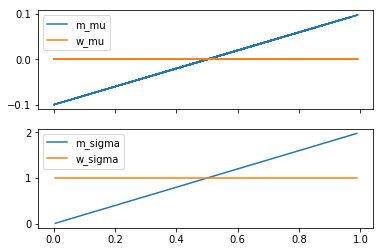

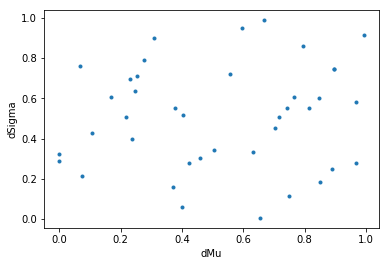

In [60]:
plotSamples(simResultsFrame)

## Plot parameter distributions

```
z= runAll(simResultsFrame,True)
a,b= plotProportion(z,'m_part_inv')
plt.show()
```

###### Print the Theta interval and the mu-sigma pairs to `CSV`

```
#results= results[['w_mu','w_sigma','m_mu','m_sigma','theta','step']]
results.to_csv('../muSigmaPairs.csv')
thetaIndex(results.iloc[0].theta, results.iloc[0].step).to_csv('../intervals.csv')
```

# Run a simulation using simulation parameters
## Select a set of simulation parameters

In [61]:
selectedResult= results.iloc[random.randint(0,len(results))]
selectedResult

w_mu                0.000000
w_sigma             1.000000
dMu                 0.716603
dSigma              0.508872
dSigma_pctChange    1.824403
m_mu                0.043321
m_sigma             1.018244
theta              -7.000000
step                0.010000
Name: 391, dtype: float64

### Marshall required variables

In [62]:
w_mu= selectedResult.w_mu
w_sigma= selectedResult.w_sigma
m_mu= selectedResult.m_mu
m_sigma= selectedResult.m_sigma

### Some variables define the domain-space

In [63]:
theta= selectedResult.theta
step= selectedResult.step

frame= thetaIndex(theta,step)
frame.head()

,index,theta
0,0,-7.000000
1,1,-6.989986
2,2,-6.979971
3,3,-6.969957
4,4,-6.959943


### Call the analysis function

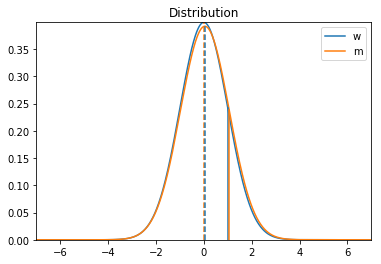

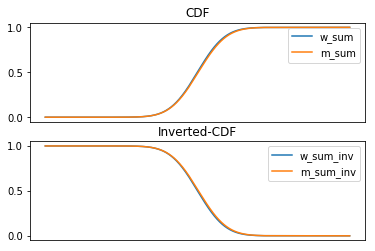

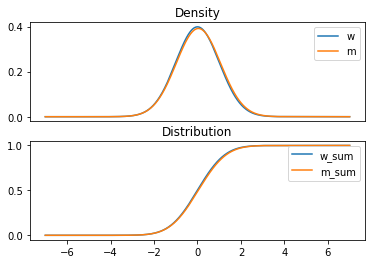

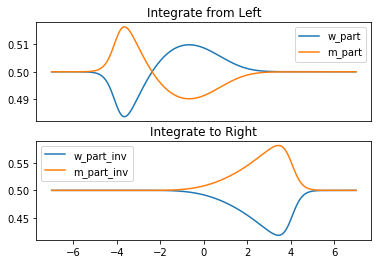

,index,theta,m,w,m_sum,w_sum,all,w_part,m_part,m_sum_inv,w_sum_inv,all_inv,w_part_inv,m_part_inv
1398,1398,7.000000,2.866419e-11,9.134720e-12,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5
1397,1397,6.989986,3.065490e-11,9.797552e-12,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5
1396,1396,6.979971,3.278069e-11,1.050743e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5
1395,1395,6.969957,3.505051e-11,1.126760e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5
1394,1394,6.959943,3.747387e-11,1.208157e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5


In [64]:
#analyzeConditions(m_mu,m_sigma,w_mu,w_sigma,frame,step,True).head(5)
analyzeConditions(m_mu,m_sigma,w_mu,w_sigma,theta,step,True)[0].head(5)

### The data frame that is passed in ultimately is not changed

In [65]:
q,c= run(selectedResult,plot=False)

In [66]:
c

{'m_mu': 0.043320665198358227,
 'm_sigma': 1.0182440301390234,
 'm_total': 0.99990000000000001,
 'm_wing': 5.0000002301083798e-05,
 'name': 391,
 'step': 0.01,
 'theta': -7.0,
 'w_mu': 0.0,
 'w_sigma': 1.0,
 'w_total': 0.99990000000000012,
 'w_wing': 5.0000001277795221e-05}

In [67]:
q['theta'][:10].apply(lambda x: q[abs(q['theta']-x)<=0.5]['m_sum'].sum()*step)

1398    0.499311
1397    0.509297
1396    0.519283
1395    0.529269
1394    0.539256
1393    0.549242
1392    0.559228
1391    0.569214
1390    0.579200
1389    0.589187
Name: theta, dtype: float64

def l(x):
    return q[q['theta'].between(x-0.5,x+0.5)]['m']

def m():
    q['theta'].apply(lambda x: q[q['theta'].between(x-0.5,x+0.5)]['m'].sum()*step)
    
def n():
    q['theta'].apply(lambda x: l(x).max()-l(x).min())
    
def o():
    q['theta'].apply(lambda x: l(x)[:-1]-l(x)[0:])
    
def p():
    q['theta'].apply(lambda x: q[abs(q['theta']-x)<=0.5]['m'].sum()*step)
    
from timeit import timeit

#print('m',timeit('m()',setup="from __main__ import m", number=10))
#print('n',timeit('n()',setup="from __main__ import n", number=10))
#print('o',timeit('o()',setup="from __main__ import o", number=10))
#print('p',timeit('p()',setup="from __main__ import p", number=10))

```
m 16.081394099999898
n 31.615779199999906
o 40.3165934000001
p 12.352546800000027
```

plotProportion(z)

run(selectedResult, plot=True).head(5)

# Run a simulation by hand

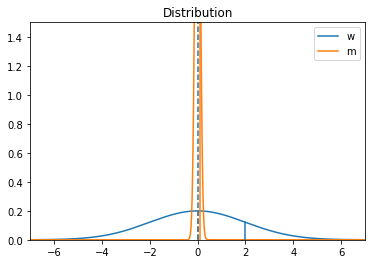

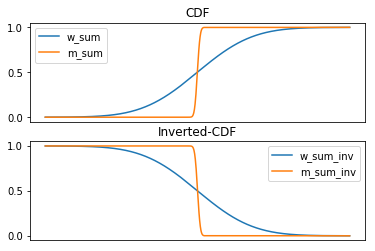

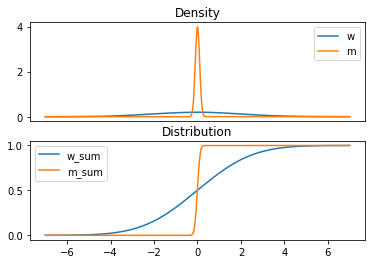

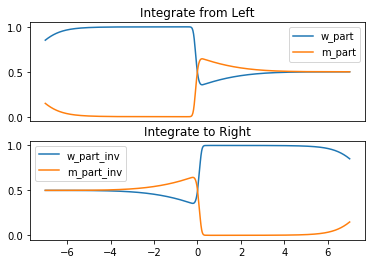

In [68]:
#r= analyzeConditions(0,.1,0,2,thetaIndex(-7,.01),.01,True)
r,c= analyzeConditions(0,.1,0,2,7,.01,True)

In [69]:
r.columns

Index(['index', 'theta', 'm', 'w', 'm_sum', 'w_sum', 'all', 'w_part', 'm_part',
       'm_sum_inv', 'w_sum_inv', 'all_inv', 'w_part_inv', 'm_part_inv'],
      dtype='object')

In [70]:
cols= ['theta', 'm_sum', 'm_sum_inv', 'w_sum', 'w_sum_inv',
       'w_part', 'm_part', 'w_part_inv', 'm_part_inv']
#filt= (r['theta']>1.6) & (r['theta']<2)
filt= (r['theta']<.5) & (r['theta']>-0.5)
#filt= r['theta']!=0

In [71]:
filt.count(), filt.sum()

(1399, 99)

In [72]:
#q= r[cols][filt][:500:100].append(r[cols][filt][-500::100])
#q= r[filt][:50:10].append(r[filt][-50::10])
q= r

In [73]:
q.head()

,index,theta,m,w,m_sum,w_sum,all,w_part,m_part,m_sum_inv,w_sum_inv,all_inv,w_part_inv,m_part_inv
1398,1398,7.000000,0.0,0.000436,0.998621,0.998394,1.997015,0.499943,0.500057,0.00005,0.000287,0.000337,0.851580,0.148420
1397,1397,6.989986,0.0,0.000444,0.998621,0.998389,1.997011,0.499942,0.500058,0.00005,0.000291,0.000341,0.853511,0.146489
1396,1396,6.979971,0.0,0.000452,0.998621,0.998385,1.997006,0.499941,0.500059,0.00005,0.000296,0.000346,0.855425,0.144575
1395,1395,6.969957,0.0,0.000460,0.998621,0.998380,1.997002,0.499940,0.500060,0.00005,0.000300,0.000350,0.857322,0.142678
1394,1394,6.959943,0.0,0.000468,0.998621,0.998376,1.996997,0.499938,0.500062,0.00005,0.000305,0.000355,0.859202,0.140798


In [74]:
q['m_kernel']= q[['theta']].applymap(lambda x: q[abs(q['theta']-x) <= 0.5]['m'].mean())

m_kernel    [Line2D(m_kernel)]
theta          [Line2D(theta)]
m                  [Line2D(m)]
dtype: object

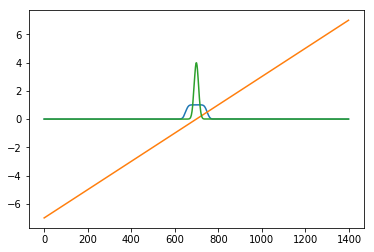

In [75]:
q[['m_kernel','theta','m']].apply(lambda x: plt.plot(q.reset_index()['index'],x))

# Create set of runs exploring variance only

C:\Users\edwardsd\Anaconda2\envs\py36\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\edwardsd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


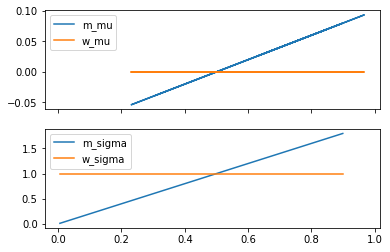

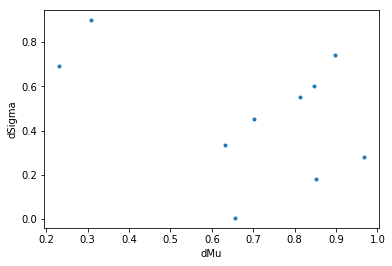

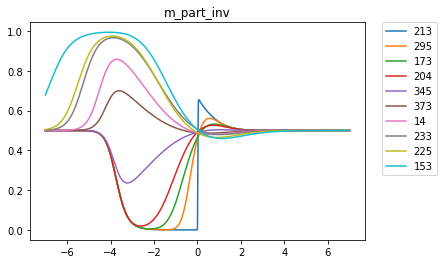

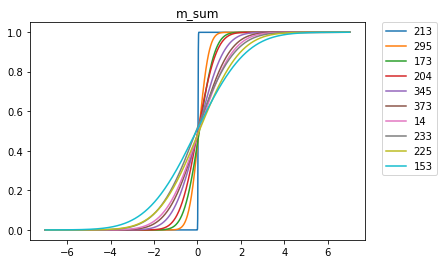

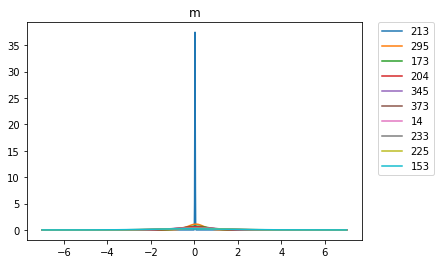

,m_mu,m_sigma,m_total,m_wing,name,step,theta,w_mu,w_sigma,w_total,w_wing
name,,,,,,,,,,,
213,0.031212,0.010590,0.9999,0.00005,213,0.01,-7.0,0.0,1.0,0.9999,0.00005
295,0.070191,0.363180,0.9999,0.00005,295,0.01,-7.0,0.0,1.0,0.9999,0.00005
173,0.093378,0.557750,0.9999,0.00005,173,0.01,-7.0,0.0,1.0,0.9999,0.00005
204,0.026588,0.669877,0.9999,0.00005,204,0.01,-7.0,0.0,1.0,0.9999,0.00005
345,0.040598,0.907563,0.9999,0.00005,345,0.01,-7.0,0.0,1.0,0.9999,0.00005


In [76]:
cols= ['w_mu', 'w_sigma', 'm_mu', 'm_sigma', 'theta', 'step']
rx= pd.DataFrame([])
#rx= pd.DataFrame()

#rx= rx.append([[0.,2.,0.,1.,4.,.1]])
#rx= rx.append([[0.,1.,0.,.05,-7.,.01]])
#rx= rx.append([[0.,2.,0.,.35,4.,.1]])
#rx= rx.append([[0.,1.,0.,.35,7.,.05]])
#rx= rx.append([[0.,1.,0.,.35,7.,.01]])
#rx= rx.append([[0.,1.,0.,.35,7.,.005]])
#rx= rx.append([[0.,1.,0.,.35,7.,.001]])
#rx= rx.append([[0.,1.,0.,.999,-10.,.01]])
#rx= rx.append([[0.,1.,0.,1.001,-10.,.1]])
#rx= rx.append([[0.,2.,0.,5.,4.,.1]])

pointMass= [0.,2.,0.,.01,10.,.0001]
uniformSpread= [0.,2.,0.,100,10.,.0001]
identicalDist= [0.,2.,0.,2.,10.,.0001]
handyConditions= pd.DataFrame([identicalDist,pointMass,uniformSpread], columns=cols)
rx= rx.append(handyConditions)

theta=8
ss=  [[0.,2.,0.,.35,theta,s] for s in np.linspace(.001,.1,5)]
gt=  [[0.,2.,0.,s,theta,.10] for s in np.linspace(2.1,3.0,8+1)]
gt2= [[0.,2.,0.,s,theta,.10] for s in np.linspace(3.05,5.0,8+1)]
gt3= [[0.,2.,0.,s,theta,.10] for s in np.linspace(5.5,90.,8+1)]
lt=  [[0.,2.,0.,s,theta,.10] for s in np.linspace(0.3,0.9,4+1)]
lt2= [[0.,2.,0.,s,theta,.10] for s in np.linspace(1.0,1.9,8+1)]

#rx= rx.append(gt[0:])
#rx= rx.append(gt2[0:])
#rx= rx.append(gt3[0:])
#rx= rx.append(lt[0:])
#rx= rx.append(lt2[0:])
#rx= rx.append(ss[0:])

rx.columns= cols
rx.reset_index(inplace=True)
rx= rx[cols]

#########
rx= simResultsFrame

#########
iStep= (int(simResultsFrame.shape[0]/12))+1
rx= rx[0::iStep]

rx= rx.append(pointMass)
rx= rx.append(uniformSpread)
rx= rx.append(identicalDist)

plotOrder= list(rx.sort_values(by=['m_sigma','step']).reset_index()['index'])


z,c= runAll(simResultsFrame[0::iStep],True)
t=z
plot=True
if plot:
    a,b= plotProportion(t,'m_part')
    plt.title('m_part_inv')
    plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    if False:
        a,b= plotProportion(t,'m_part_inv')
        plt.title('m_part')
        plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    
    if 'm_part_kern' in t.columns:
        a,b= plotProportion(t,'m_part_kern')
        plt.title('m_part_kern')
        plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

    a,b= plotProportion(t,'m_sum')
    plt.title('m_sum')
    plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    if False:
        a,b= plotProportion(t,'m_sum_inv')
        plt.title('m_sum_inv')
        plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

    a,b= plotProportion(t,'m')
    plt.title('m')
    plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    #plt.legend(a,rx['index'].unique())
    #plt.legend(a,rx.index)

c.head()

In [77]:
c.shape

(10, 11)

In [78]:
start= .03
end= 1.75
lt= [[0.,2.,0.,s,4.,.05] for s in np.linspace(start,end,8+1)]

interval= np.linspace(start,end,8+1)
print(interval)
interval_range= (end-start)
loginterval= list(map(log,interval))
loginterval_max= max(loginterval)
loginterval_min= min(loginterval)
loginterval_range= loginterval_max-loginterval_min

print(loginterval)

start= log(start,10)
end= log(end,10)
lt= [[0.,2.,0.,s,4.,.05] for s in np.logspace(start,end,8+1)]
print(np.logspace(start,end,8+1).round(2))

[ 0.03   0.245  0.46   0.675  0.89   1.105  1.32   1.535  1.75 ]
[-3.506557897319982, -1.40649706843741, -0.7765287894989964, -0.3930425881096072, -0.11653381625595151, 0.09984533496971612, 0.27763173659827955, 0.4285303810391604, 0.5596157879354227]
[ 0.03  0.05  0.08  0.14  0.23  0.38  0.63  1.05  1.75]


```
z.to_csv('../bigInterval.csv')
rx.to_csv('../muSigmaPairs.csv')
```

```
#def computeRunData(m_mu,m_sigma,w_mu,w_sigma,frame,step):
#    return m_total,m_wing,pdfM,w_total,w_wing,pdfW,d
```

z,c= runAll(rx,True)
c.set_index(c['name']).head()

In [79]:
z.head()

,index,theta,m,w,m_sum,w_sum,all,w_part,m_part,m_sum_inv,w_sum_inv,all_inv,w_part_inv,m_part_inv,name
1398,1398,7.000000,0.0,9.134720e-12,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5,213
1397,1397,6.989986,0.0,9.797552e-12,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5,213
1396,1396,6.979971,0.0,1.050743e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5,213
1395,1395,6.969957,0.0,1.126760e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5,213
1394,1394,6.959943,0.0,1.208157e-11,0.998621,0.998621,1.997243,0.5,0.5,0.00005,0.00005,0.0001,0.5,0.5,213


In [80]:
z.sort_values(by=['name','theta'])
pd.concat([z.groupby('name')['m','w'].first(),
z.groupby('name')['m','w'].last()],axis=1)

,m,w,m,w
name,,,,
14,2.348909e-08,9.134720e-12,1.205789e-08,9.134720e-12
153,1.047693e-04,9.134720e-12,1.236860e-04,9.134720e-12
173,3.608757e-34,9.134720e-12,5.398815e-36,9.134720e-12
204,1.750247e-24,9.134720e-12,7.635600e-25,9.134720e-12
213,0.000000e+00,9.134720e-12,0.000000e+00,9.134720e-12
225,5.371038e-06,9.134720e-12,3.249773e-06,9.134720e-12
233,7.137239e-07,9.134720e-12,1.054530e-06,9.134720e-12
295,9.579624e-80,9.134720e-12,5.569290e-83,9.134720e-12
345,7.488299e-14,9.134720e-12,3.755802e-14,9.134720e-12


z,c= runAll(rx,True)

In [81]:


allCols= list(c.columns)
allCols+= ['N']

#Frequency
agg2= z.groupby('name')['w'].count()
agg2.name= 'N'

#Density
dCols= ['m','w']
agg= z.groupby('name')['m','w'].sum()
agg.columns= ['total_'+d for d in dCols] #['total_m','total_w']
allCols+= (list(agg.columns))

#Distribution
dCols= ['m_sum','m_sum_inv','w_sum','w_sum_inv']
agg3= z.groupby('name')[dCols].max()
agg3.columns= ['max_'+d for d in dCols]
allCols+= (list(agg3.columns))

agg4= z.groupby('name')[dCols].min()
agg4.columns= ['min_'+d for d in dCols]
allCols+= (list(agg4.columns))

aggNX= pd.concat([agg3,agg4], axis=1)
aggNX_orig= aggNX.copy()
#print("********")
##mCols= list(filter(lambda x: x.find('_m_')!=-1,list(aggNX.columns)))
#print(mCols)
#print("********")
#print(aggNX[mCols].apply(lambda x: x+c['m_wing']).head(40))

aggNX['max_m_sum']= aggNX['max_m_sum']+c['m_wing']
aggNX['max_w_sum']= aggNX['max_w_sum']+c['w_wing']
aggNX['min_m_sum']= 1-(aggNX['min_m_sum']-c['m_wing'])
aggNX['min_w_sum']= 1-(aggNX['min_w_sum']-1.*c['w_wing'])
#
aggNX['max_m_sum_inv']= 0+(aggNX['max_m_sum_inv']+c['m_wing'])
aggNX['max_w_sum_inv']= 0+(aggNX['max_w_sum_inv']+c['w_wing'])
aggNX['min_m_sum_inv']= 1-(aggNX['min_m_sum_inv']-c['m_wing'])
aggNX['min_w_sum_inv']= 1-(aggNX['min_w_sum_inv']-c['w_wing'])
print(aggNX.columns)
#cols= ['max_m_sum', 'max_m_sum_inv', 'max_w_sum', 'max_w_sum_inv', 'min_m_sum', 'min_m_sum_inv', 'min_w_sum', 'min_w_sum_inv']
cols= ['max_m_sum', 'max_w_sum', 'min_m_sum', 'min_w_sum',
       'max_m_sum_inv', 'max_w_sum_inv', 'min_m_sum_inv', 'min_w_sum_inv']
#print(aggNX[cols].head(40))
print(pd.concat([c[['m_wing','w_wing']],aggNX[cols]], axis=1).head(5))
#0.5*step*pdf(mu,sigma)(theta)

aggConfig= pd.concat([c,agg2,aggNX], axis=1)
#print(aggConfig.columns)
#print(aggConfig.head(4))

agg= agg.apply(lambda x: aggConfig['step']*x)
aggResult= pd.concat([agg,aggConfig], axis=1)
aggResult.columns

#aggResult[allCols].head()
aggResult.head(4)
#c.head(4)

Index(['max_m_sum', 'max_m_sum_inv', 'max_w_sum', 'max_w_sum_inv', 'min_m_sum',
       'min_m_sum_inv', 'min_w_sum', 'min_w_sum_inv'],
      dtype='object')
        m_wing   w_wing  max_m_sum  max_w_sum  min_m_sum  min_w_sum  \
name                                                                  
14    0.000050  0.00005   0.998671   0.998671   1.000000        1.0   
153   0.000104  0.00005   0.998681   0.998671   0.999999        1.0   
173   0.000050  0.00005   0.998671   0.998671   1.000000        1.0   
204   0.000050  0.00005   0.998671   0.998671   1.000000        1.0   
213   0.000050  0.00005   0.998671   0.998671   1.000000        1.0   

      max_m_sum_inv  max_w_sum_inv  min_m_sum_inv  min_w_sum_inv  
name                                                              
14         0.998671       0.998671       1.000000            1.0  
153        0.998681       0.998671       0.999999            1.0  
173        0.998671       0.998671       1.000000            1.0  
204       

,total_m,total_w,m_mu,m_sigma,m_total,m_wing,name,step,theta,w_mu,...,w_wing,N,max_m_sum,max_m_sum_inv,max_w_sum,max_w_sum_inv,min_m_sum,min_m_sum_inv,min_w_sum,min_w_sum_inv
name,,,,,,,,,,,,,,,,,,,,,
14,0.998571,0.998571,0.069499,1.207952,0.9999,0.000050,14,0.01,-7.0,0.0,...,0.00005,1399,0.998671,0.998671,0.998671,0.998671,1.000000,1.000000,1.0,1.0
153,0.998473,0.998571,-0.038348,1.798463,0.9999,0.000104,153,0.01,-7.0,0.0,...,0.00005,1399,0.998681,0.998681,0.998671,0.998671,0.999999,0.999999,1.0,1.0
173,0.998571,0.998571,0.093378,0.557750,0.9999,0.000050,173,0.01,-7.0,0.0,...,0.00005,1399,0.998671,0.998671,0.998671,0.998671,1.000000,1.000000,1.0,1.0
204,0.998571,0.998571,0.026588,0.669877,0.9999,0.000050,204,0.01,-7.0,0.0,...,0.00005,1399,0.998671,0.998671,0.998671,0.998671,1.000000,1.000000,1.0,1.0


In [82]:
c.apply(lambda x: 0.5*x.step*pdf(x.m_mu,x.m_sigma)(-x.theta), axis='columns')

name
213    0.000000e+00
295    4.789812e-82
173    1.804378e-36
204    8.751234e-27
345    3.744149e-16
373    4.289247e-12
14     1.174454e-10
233    3.568619e-09
225    2.685519e-08
153    5.238463e-07
dtype: float64

In [83]:
agg.apply(lambda x: aggConfig['step']*x).head(2)

,total_m,total_w
name,,
14,0.009986,0.009986
153,0.009985,0.009986


## Analyze the data created by running the simulation(s)

###### Find the local maximum for each curve

In [86]:
findOptima(z,'max','m','part_inv',0.5).head(2)

Empty DataFrame
Columns: [name]
Index: []


KeyError: "['index' 'm_part_inv'] not in index"

```
yX= z[(z['m']>0.05) & (z['m']<0.95)].groupby('name',as_index=False)['name','m_part_inv'].idxmax()
yX.reset_index(inplace=True)
yX= yX[['index','m_part_inv']]
yX.columns=['name','index']
yX= yX.merge(z)[:]
yX= yX[['name','index','theta']]
yX.head()
```

###### Find the local minimum for each curve

In [ ]:
findOptima(z,'min','m','part_inv',0.05).head(2)

```
yN= z.groupby('name',as_index=False)['name','m_part_inv'].idxmin()
yN.reset_index(inplace=True)
yN= yN[['index','m_part_inv']]
yN.columns=['name','index']
yN= yN.merge(z)[:]
yN= yN[['name','index','theta']]
yN.head()
```

#### Plot subsets of the results

In [ ]:
e= 0
#t= y[['name','index']].merge(z, on='name')
#t= t[(t['index_x']-100)<=t['index_y']]
t=z
#t= t[(t['m_part_inv']>=0.55) & (t['m_part_inv']<=0.95)]
##t= t[(t['theta']-e)<=0.2) & (t['theta']<=0.0235)]
#t= t[abs(t['theta']-e)<=0.02]
#t= t[t['name']==2].sort_values(by='m_sum')
t[['name','index','theta','m','m_sum','m_sum_inv','m_part','m_part_inv']].head()

In [ ]:
#& (t['theta']>0.5) & (t['theta']<2.0)\
temp= t[((t['name']==1) | (t['name']==2)) \
        & (t['theta']>2.5) & (t['theta']<3.5)\
       ][['index','theta','name','m_part_inv','w_part_inv','all_inv']]

In [ ]:
t1= temp[temp['name']==1][::2].set_index(round(temp[temp['name']==1][::2]['theta'],2))
t1= t1.groupby(level=0).first()
t2= temp[temp['name']==2].set_index(round(temp[temp['name']==2]['theta'],2))
t2= t2.groupby(level=0).first()
print(t1.head(4))
print(t2.head(4))

In [ ]:
pd.concat([t1,t2],axis=1)[::20]

In [ ]:
t=z
#t= t[t['name']!=0]
#t= t[t['theta'].between(.85,4)]

a,b = plotProportion(t,'all_inv')
#plt.legend(a,b)
plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

a,b = plotProportion(t,'m_sum_inv')
#plt.legend(a,b)
plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

a,b = plotProportion(t,'m_part_inv')
#plt.legend(a,b)
plt.legend(a,b,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#_,_ = plotProportion(t,'m_part_kern')
#plt.show()

c.head(6)

In [ ]:
pdf(0,.00001)(0)

# Investigate a single specific run (point-mass at mean)

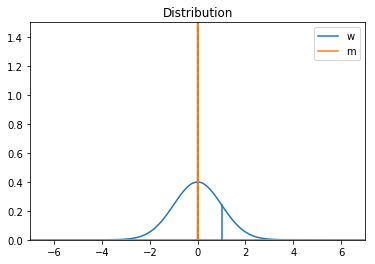

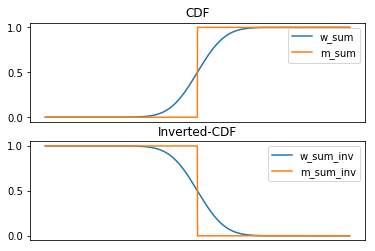

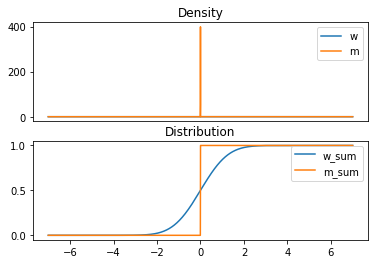

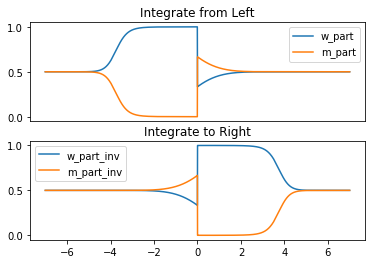

,index,theta,m,w,m_sum,w_sum,all,w_part,m_part,m_sum_inv,w_sum_inv,all_inv,w_part_inv,m_part_inv
13998,13998,7.000000,0.0,9.134720e-12,0.999907,0.999907,1.999814,0.5,0.5,0.00005,0.00005,0.0001,0.500013,0.499987
13997,13997,6.999000,0.0,9.198892e-12,0.999907,0.999907,1.999814,0.5,0.5,0.00005,0.00005,0.0001,0.500013,0.499987
13996,13996,6.998000,0.0,9.263506e-12,0.999907,0.999907,1.999814,0.5,0.5,0.00005,0.00005,0.0001,0.500013,0.499987
13995,13995,6.997000,0.0,9.328564e-12,0.999907,0.999907,1.999814,0.5,0.5,0.00005,0.00005,0.0001,0.500013,0.499987
13994,13994,6.995999,0.0,9.394069e-12,0.999907,0.999907,1.999814,0.5,0.5,0.00005,0.00005,0.0001,0.500013,0.499987


In [87]:
#r= analyzeConditions(0,.001,0,1,thetaIndex(-7,.001),.001,True)
r,c1= analyzeConditions(0,.001,0,1,7,.001,True)
r.head()

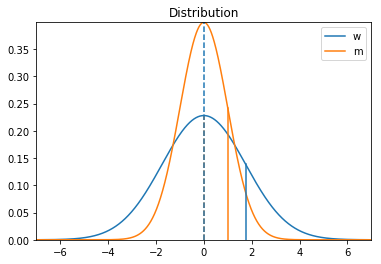

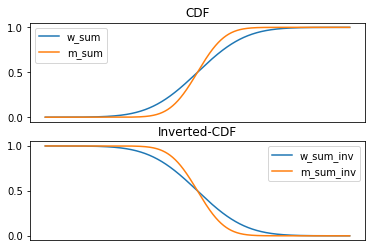

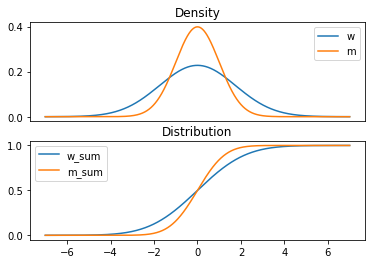

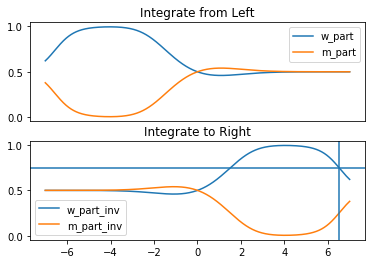

,index,theta,m,w,m_sum,w_sum,all,w_part,m_part,m_sum_inv,w_sum_inv,all_inv,w_part_inv,m_part_inv
0,0,-7.000000,9.134720e-12,0.000076,0.00005,0.000082,0.000132,0.620434,0.379566,0.999907,0.999876,1.999783,0.499992,0.500008
1,1,-6.999000,9.198892e-12,0.000077,0.00005,0.000082,0.000132,0.620654,0.379346,0.999907,0.999875,1.999783,0.499992,0.500008
2,2,-6.998000,9.263506e-12,0.000077,0.00005,0.000082,0.000132,0.620875,0.379125,0.999907,0.999875,1.999783,0.499992,0.500008
3,3,-6.997000,9.328564e-12,0.000077,0.00005,0.000082,0.000132,0.621097,0.378903,0.999907,0.999875,1.999782,0.499992,0.500008
4,4,-6.995999,9.394069e-12,0.000077,0.00005,0.000082,0.000132,0.621318,0.378682,0.999907,0.999875,1.999782,0.499992,0.500008


In [180]:
#r= analyzeConditions(0,2,0,1,thetaIndex(-7,.001),.001,True)
r,c2= analyzeConditions(0,1,0,1.75,7,.001,True)
r.head()

In [181]:
#abs(r.apply(lambda x: max(r['w_part_inv'],r['m_part_inv']), axis='columns')-0.75).idxmin()['theta']
r.ix[abs(r.apply(lambda x: max(x['w_part_inv'],x['m_part_inv']), axis='columns')-0.75).idxmin()]['theta']

6.5089298471210171

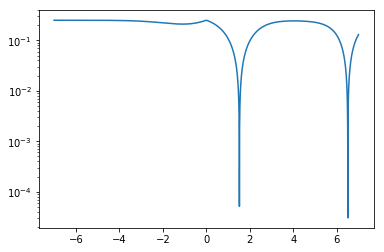

In [195]:
r.sort_values(by='theta',ascending=True,inplace=True)
r['r75']= abs(r.apply(lambda x: max(x['w_part_inv'],x['m_part_inv']), axis='columns')-0.75)
plt.plot(r['theta'],r75)
ax= plt.gca()
ax.set_yscale("log", nonposy='clip')

In [171]:
c2['m_sigma']*2+c2['m_mu']

4

In [197]:
r[r['r75']<=0.01].sort_values(by='r75')[['index','theta','r75']]

,index,theta,r75
13507,13507,6.508930,0.000030
8521,8521,1.522217,0.000051
8520,8520,1.521217,0.000163
13506,13506,6.507930,0.000252
8522,8522,1.523218,0.000266
13508,13508,6.509930,0.000313
8519,8519,1.520217,0.000378
8523,8523,1.524218,0.000480
13505,13505,6.506930,0.000535
8518,8518,1.519217,0.000592
